<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из банка стали уходить клиенты. Каждый месяц. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Следует построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Также роверить *F1*-меру на тестовой выборке.

Дополнительно измерить *AUC-ROC*, сравнить её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# Импорт библиотеки pandas
import pandas as pd
# Импорт библиотеки numpy
import numpy as np
# Импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# Импорт библиотеки math
import math
# Импорт библиотеки seaborn
import seaborn as sns
# Импорт библиотеки re
import re
# Импорт библиотеки sklearn и необходимых компонентов
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
# Удаление ложных предупреждений
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Загрузка таблицы в память переменной df типа dataframe
df = pd.read_csv('/datasets/Churn.csv')
# Разделители для удобства отображения информации указаны в виде отдельных пунктов 'print("\033[1m\033[43m {}".format('----- Text -----'),"\033[0m")'
print("\033[1m\033[43m {}".format('----- Просмотр общей информации о dataframe -----'),"\033[0m")
df.info()
print("\033[1m\033[43m {}".format('----- Информация о заголовках полей dataframe -----'),"\033[0m")
print(df.columns)
print("\033[1m\033[43m {}".format('----- Информация о типах полей dataframe -----'),"\033[0m")
print(df.dtypes)
print("\033[1m\033[43m {}".format('----- Отображение на экране в читаемом виде первых записей таблицы dataframe для визуального анализа -----'),"\033[0m")
display(df.head())
print('Количество явных дубликатов', df.duplicated().sum())

 ----- Просмотр общей информации о dataframe ----- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
 ----- Информация о заголовках полей dataf

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Количество явных дубликатов 0


<font color='DarkBlue'> 
📌 Импортированы все библиотеки, используемые далее в проекте, и скорректированы настройки <br>
📌 В ходе первичного анализа данных сформированы следующие выводы: <br>
    
1. Присутствует необходимость в редактировании заголовков, названия представлены в формате "Верблюжий регистр", рекомендуется отобразить в условно общепринятом формате 'Змеиный регистр'
2. Отсутствуют явные дубликаты, на данном этапе удаление строк не требуется
3. Выявлено наличие пропусков в поле 'Tenure', нужно исследовать данные
4. Тип данных некоторых числовых полей желательно преобразовать для уменьшения объема памяти хранения данных
5. В данных таблицы некорректные значения не наблюдаются. Необходимо детально рассмотреть параметры каждого столбца
</font> 

In [3]:
col = []
for i in range(len(df.columns)):
    col.append(re.sub(r'(?<!^)(?=[A-Z])', '_', df.columns[i]).lower())
df.columns = col
display(df.head())

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<font color='DarkBlue'> 
📌 Заголовки полей приведены к общепринятому формату <br>
📌 Необходимо определить, присутствуют ли зависимости между полем "Tenure" с пропусками и остальными признаками <br>
</font> 

In [4]:
df[df['tenure'].isna()]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


<font color='DarkBlue'> 
📌 Зависимостей не наблюдается, причиной пропуском скорее является техническая ошибка, так как их количество, составляющее десятую часть всех записей, достаточно большое. Удалять такое количество данных не желательно, корректно заменить на среднее значение столбца без распределения по подгруппам (как видно из описания describe далее аномальные значения не наблюдаются, распределение корректное). Данное поле не является критичным для определения целевого признака, в исходном датасете таковых 10 (после удаления далее неинформативных). Можно рассмотреть основные характеристики распределений до преобразования и далее сравнить с полученными <br>
</font> 

In [5]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [6]:
df.loc[df['tenure'].isna(),'tenure'] = round(df['tenure'].mean())
if df[df['tenure'] % 1 > 0]['tenure'].count() == 0:
        df['tenure'] = df['tenure'].astype('int')

<font color='DarkBlue'> 
📌 Теперь необходимо детально рассмотреть параметры каждого столбца и построить гистограммы распределения <br>
</font> 

,row_number,customer_id,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,surname,geography,gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


-----
Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
McVey       1
Mayne       1
Abrego      1
Kibble      1
Seppelt     1
Name: surname, Length: 2932, dtype: int64
-----
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64
-----
Male      5457
Female    4543
Name: gender, dtype: int64
-----
row_number


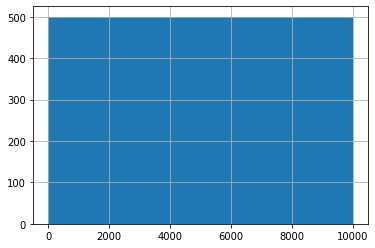

customer_id


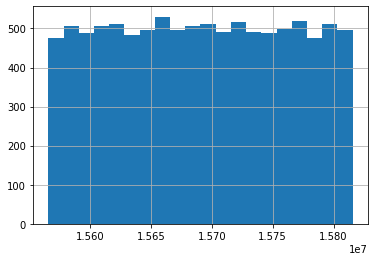

credit_score


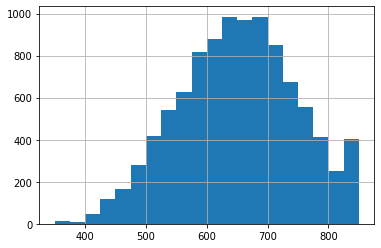

geography


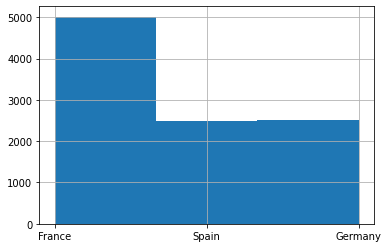

gender


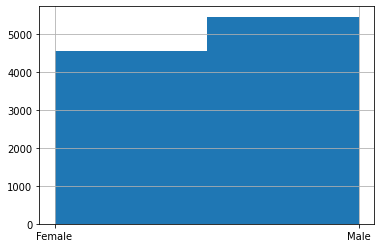

age


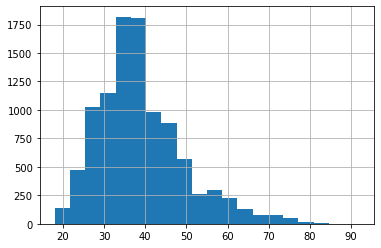

tenure


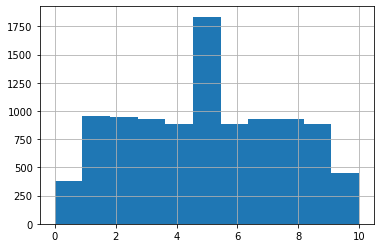

balance


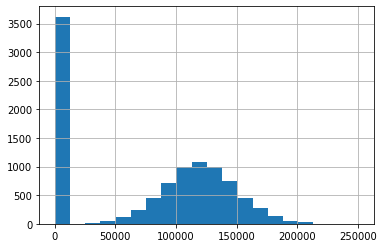

num_of_products


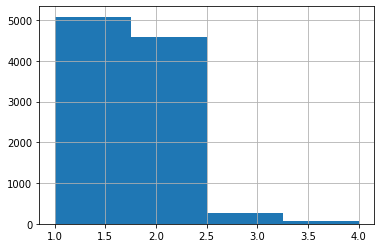

has_cr_card


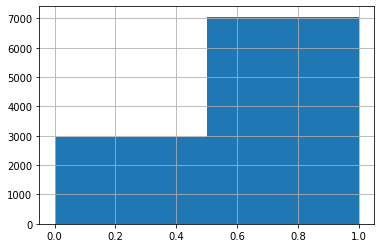

is_active_member


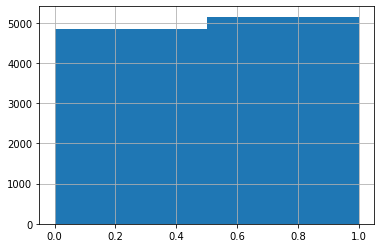

estimated_salary


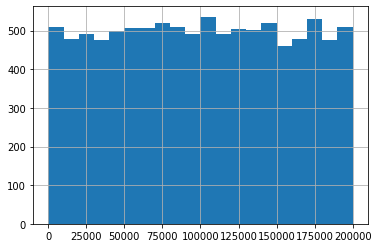

exited


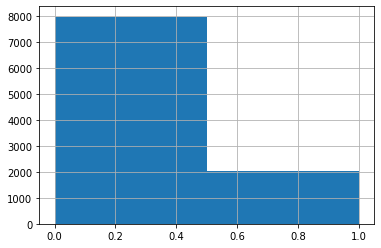

In [7]:
display(df.describe())
try:
    display(df.describe(include = ['object','bool','datetime']))
    for i in df.select_dtypes(include=['object','bool','datetime']):
        print('-----')
        if df[i].count() != len(df[i].unique()):
            print(df[i].value_counts())
        else:
            print('Все значения уникальны')
except:
    print('Все данные представлены в числовом формате')
print('-----')
for i in df:     
    if not ((df[i].dtype == 'object') & (len(df[i].unique()) > 20)):
        print(i)
        if (len(df[i].unique()) < 20):
            df[i].hist(bins=len(df[i].unique()))
            plt.show()  
        else:        
            df[i].hist(bins=20)
            plt.show()

<font color='DarkBlue'> 
📌 Из полученных графиков можно сделать следующие выводы: 
    
- большинство клиентов банка территориально находится во Франции, 
- кредитный рейтинг в данной выборке распределен нормально, большинство клиентов имеют хороший, но есть контингент, имеющий скорее всего максимальный, так как в правой части гисторгаммы наблюдается увеличение,
- большинство имеет кредитные карты и моложе 40 лет (интересует скорее продукты подобные ипотеке, чем пенсионное страхование),
- ожидаемая зарплата клиентов распределена равномерно,
- чаще клиенты пользуются 1-2 продуктами,
- приблизительно одинаковое количество активных и неактивных клиентов,
- много клиентов с нулевым балансом счетов, видимо не являющихся актисными пользователями,
- меньшинство клиентов отказывается от услуг банка, но их достаточно много для данного признака <br>
  
📌 Характеристики признака 'tenure' после преобразований почти не изменились, соответственно пропуски скорее случайны: среднее осталось таким же, среднеквадратичное отклонение немного уменьшено, и 25 процентиль сдвинут в сторону среднего на 1 пункт <br>
📌 Далее необходимо выполнить преобразование типов данных, если отсутствует необходимость в осуществлении арифметических операций между значениями датасета <br>
</font> 

In [8]:
df[df.select_dtypes(include=['int']).columns] = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  uint16 
 1   customer_id       10000 non-null  uint32 
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  uint16 
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  uint8  
 7   tenure            10000 non-null  uint8  
 8   balance           10000 non-null  float32
 9   num_of_products   10000 non-null  uint8  
 10  has_cr_card       10000 non-null  uint8  
 11  is_active_member  10000 non-null  uint8  
 12  estimated_salary  10000 non-null  float32
 13  exited            10000 non-null  uint8  
dtypes: float32(2), object(3), uint16(2), uint32(1), uint8(6)
memory usage: 449.3+ KB


Удалить row_number, customer_id и surname (зависимости не наблюдаются)

<font color='DarkBlue'> 
📌 Необходимо удалить столбцы, не несущие полезной информации, так как модель машинного обучения будет их использовать для своего алгоритма и пытаться построить неполезные связи: 'row_number', 'customer_id', 'surname' <br>
</font> 

In [9]:
df = df.drop(['row_number','customer_id','surname'], axis=1)

<font color='DarkBlue'> 
📌 Важно изучить корреляции в данных, можно оценить взаимосвязи в данных и влияние параметров на целевой признак. <br>
</font> 

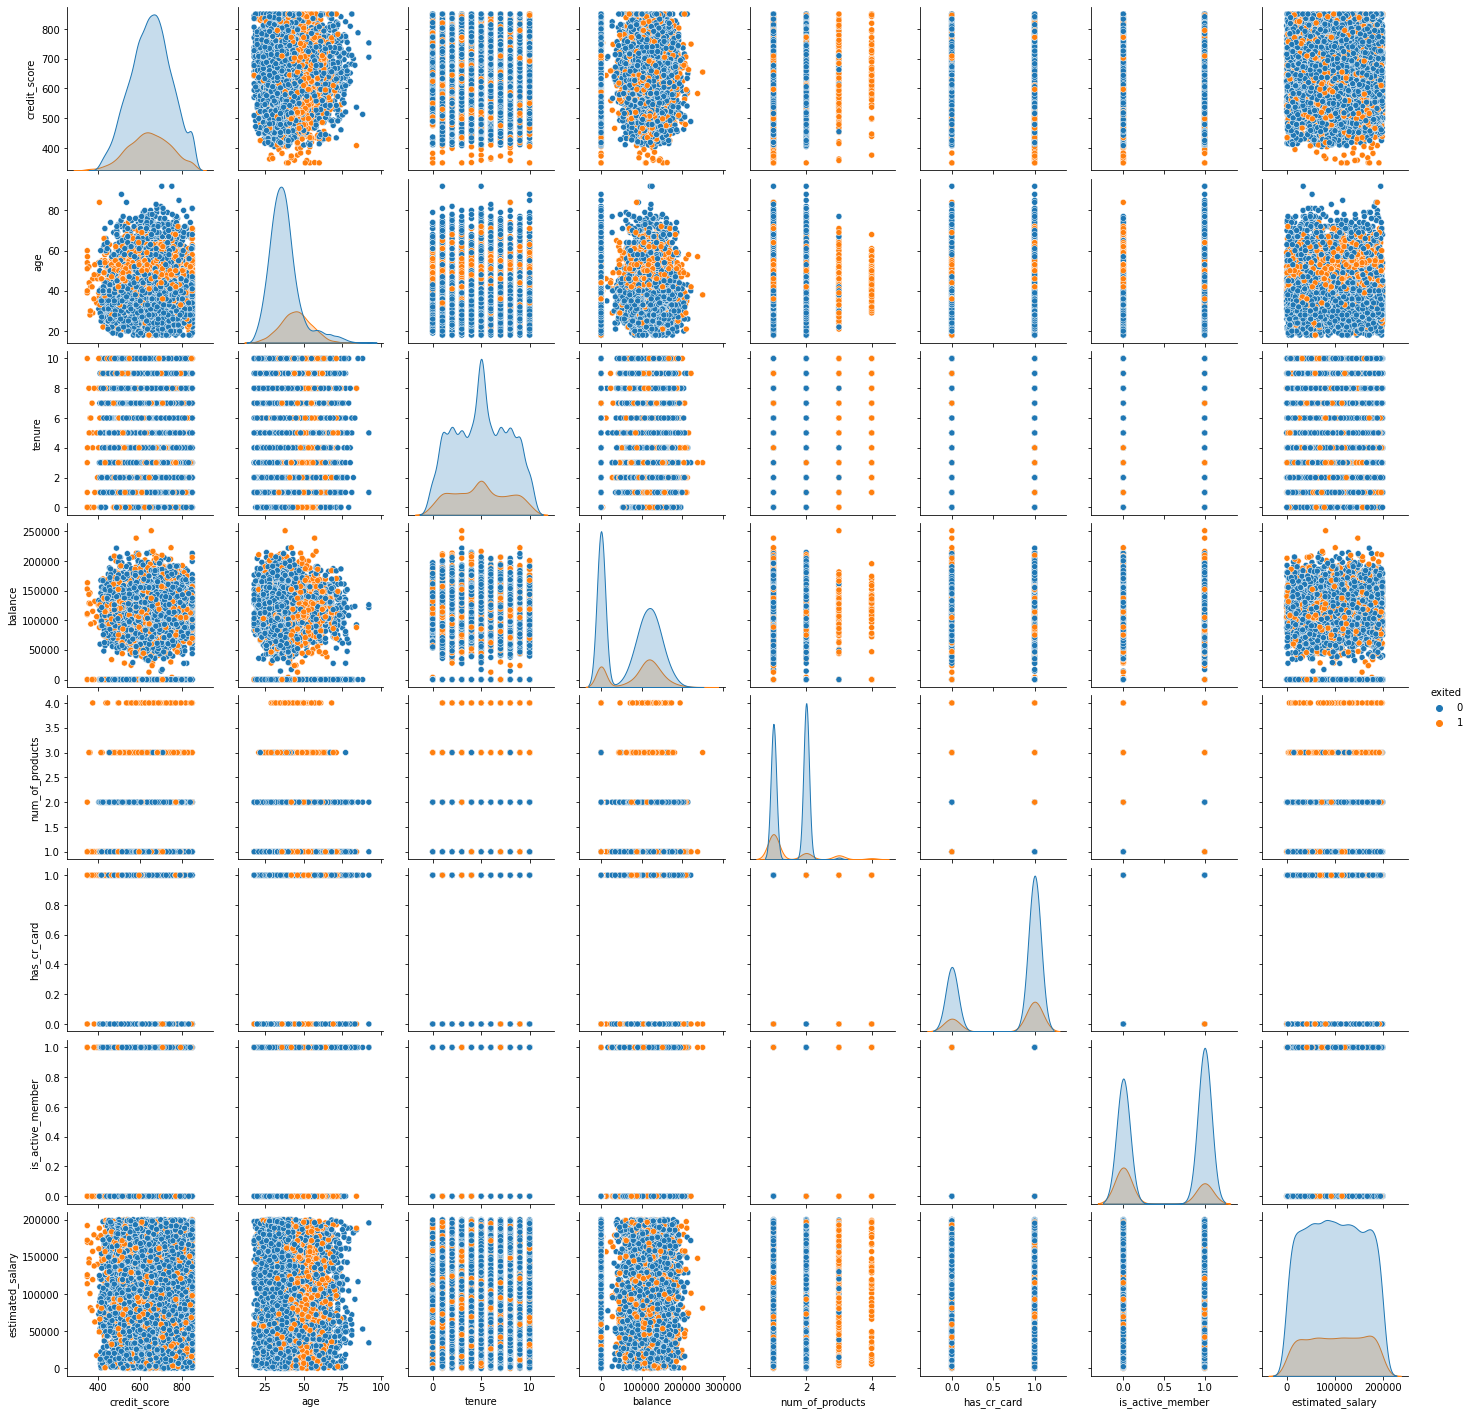

In [10]:
sns.pairplot(df, hue='exited')

<font color='DarkBlue'> 
📌 Заметно следующее: 
    
- клиенты, не являющиеся активными пользователями услуг банка, уходят чаще
- среди клиентов старшего возраста (около 40) больше ушедших, основными клиентами являются молодые люди
- клиенты, пользующиеся несколькими услугами банка, уходят чаще, реже таковыми являются клиенты, пользующеся двумя <br>
</font> 

## Исследование задачи

<font color='DarkBlue'> 
📌 Наблюдается задача бинарной классификации для определения вероятности оттока клиентов по их признакам, занесенным в базу <br>
📌 Необходимо исследовать баланс классов <br>
</font> 

In [11]:
df['exited'].mean()

0.2037

<font color='DarkBlue'> 
📌 Нулевой класс, свидетельствующий о потенциальной удовлетворенности клиентов, преобладает с разницей в 4 раза, что является не очень хорошим показателем в зависимости от контекста, но и не критичным <br>
📌 Нужно обучить модели без учета дисбаланса классов. Для этого необходимо закодировать объекты номинального категориального типа 'object' ('geography' и 'gender') <br>
📌 Для алгоритма 'Случайный лес' рекомендуется закодировать указанные элементы, используя метод порядкового кодирования (Ordinal Encoding), образуя меньшее количество признаков, для соответствия целевого признака более близкому закодированному значению <br>
📌 Сначала необходимо разделить исходный набор данных на два: с признаками для обучения модели и целевым признаком для его определения, затем разбить полученные выборки на обучающую, валидационную и тестовую, исходя из общепринятого соотношения 60-20-20 и проверить их размеры <br>
</font> 

In [12]:
encoder = OrdinalEncoder()
df_ordinal = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)
df_features_oe = df_ordinal.drop('exited', axis=1)
df_target_oe = df_ordinal['exited']
df_features_train_oe, df_features_valid_oe, df_target_train_oe, df_target_valid_oe = train_test_split(df_features_oe, df_target_oe, stratify=df_target_oe, test_size=0.4, random_state=12345)
df_features_valid_oe, df_features_test_oe, df_target_valid_oe, df_target_test_oe = train_test_split(df_features_valid_oe, df_target_valid_oe, stratify=df_target_valid_oe, test_size=0.5, random_state=12345)
print(df_features_train_oe.shape)
print(df_target_train_oe.shape)
print(df_features_valid_oe.shape)
print(df_target_valid_oe.shape)
print(df_features_test_oe.shape)
print(df_target_test_oe.shape)

(6000, 10)
(6000,)
(2000, 10)
(2000,)
(2000, 10)
(2000,)


<font color='DarkBlue'> 
📌 Можно рассмотреть состав промежуточной таблицы с признаками после преобразования Ordinal Encoding <br>
</font> 

In [13]:
df_features_train_oe.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
2837,158.0,1.0,0.0,31.0,6.0,3642.0,0.0,0.0,1.0,4685.0
9925,303.0,0.0,0.0,20.0,5.0,6337.0,0.0,1.0,1.0,4273.0
8746,269.0,0.0,1.0,16.0,8.0,2076.0,1.0,0.0,1.0,9122.0
660,241.0,1.0,0.0,23.0,5.0,658.0,0.0,1.0,1.0,1643.0
3610,189.0,0.0,0.0,38.0,1.0,4198.0,0.0,1.0,0.0,5367.0


<font color='DarkBlue'> 
📌 Можно обучить модель в соответствии с алгоритмом 'Случайный лес', используя в качестве гиперпараметров 3 основных вида критериев, изменяемую глубину дерева от 1 до 10, их количество от 1 до 51 с шагом 10 и критерий. Предполагается использовать валидационную выборку для определения наилучшей модели <br>
📌 Полезным для перебора большого количество параметров является инструмент GridSearchCv с использованием перекрестной обучающей выборки <br>
</font> 

In [14]:
model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model, {'criterion': ['gini', 'entropy'], 'n_estimators': range (1, 51, 10), 'max_depth': range (1, 11)}, scoring='f1', cv=3)
grid.fit(df_features_train_oe, df_target_train_oe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)    

Лучшая модель: RandomForestClassifier(max_depth=8, n_estimators=41, random_state=12345)
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 41}
Лучшая метрика F1: 0.5452433183260056


<font color='DarkBlue'> 
📌 Получены значения лучших гиперпараметров модели <br>
📌 Желательно написать функцию, которая, принимая на вход обученную модель и валидационную выборку, будет определять необходимые параметры - метрики 'accuracy', полноту 'recall', точность 'precision', f1-меру 'f1', площадь под ROC-кривой 'roc_auc', затем отображать графики кривых PR и ROC и сохранять результаты сравнения <br>
</font> 

In [15]:
table = pd.DataFrame(columns = ['name','score','recall','precision','f1','roc_auc'])
def analysis(model, df_features_valid, df_target_valid, name):
    df_predicted_valid = model.predict(df_features_valid)
    print(confusion_matrix(df_target_valid, df_predicted_valid))
    print('Recall:', recall_score(df_target_valid, df_predicted_valid))
    print('Precision:', precision_score(df_target_valid, df_predicted_valid))
    print('F1:', f1_score(df_target_valid, df_predicted_valid))
    df_probabilities_valid = model.predict_proba(df_features_valid)
    df_probabilities_one_valid = df_probabilities_valid[:, 1]
    precision, recall, thresholds = precision_recall_curve(df_target_valid, df_probabilities_one_valid)
    plt.figure(figsize=(6, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('Кривая Precision-Recall')
    plt.show() 
    fpr, tpr, thresholds = roc_curve(df_target_valid, df_probabilities_one_valid)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])
    plt.title('ROC-кривая')
    plt.show() 
    print('Площадь под ROC-кривой', roc_auc_score(df_target_valid, df_probabilities_one_valid))
    return table.append({'name': name, 'score': model.score(df_features_valid, df_target_valid), 'recall': recall_score(df_target_valid, df_predicted_valid), 'precision': precision_score(df_target_valid, df_predicted_valid), 'f1': f1_score(df_target_valid, df_predicted_valid), 'roc_auc': roc_auc_score(df_target_valid, df_probabilities_one_valid)}, ignore_index=True)

<font color='DarkBlue'> 
📌 Теперь можно определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение обобщающей функции для созданной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.877
Accuracy определенной модели на валидационной выборке: 0.8595
Accuracy определенной модели на тестовой выборке: 0.8495
[[1544   48]
 [ 233  175]]
Recall: 0.42892156862745096
Precision: 0.7847533632286996
F1: 0.554675118858954


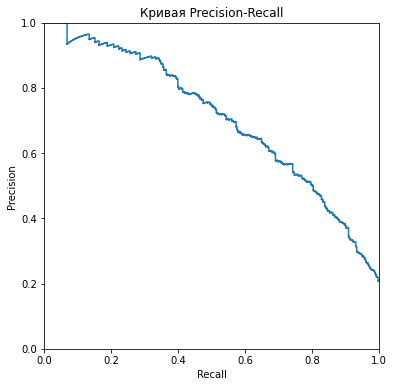

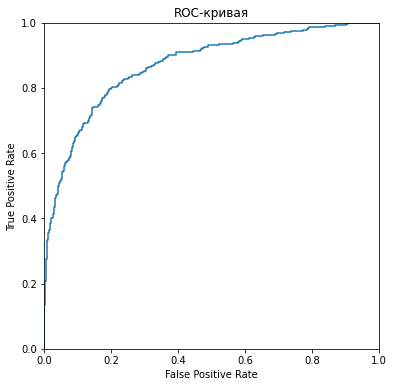

Площадь под ROC-кривой 0.8702458370282786


In [16]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_oe, df_target_train_oe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_oe, df_target_test_oe))
table = analysis(grid.best_estimator_, df_features_valid_oe, df_target_valid_oe, 'RFC+OE')

<font color='DarkBlue'> 
📌 Площадь под ROC-кривой больше 0.5, модель отвечает критериям адекватности <br>
📌 Для информации далее можно проверить модели на адекватность, сравнив с выборкой, состоящей из целевых признаков нулевого класса <br>
</font> 

<font color='DarkBlue'> 
📌 Для информации далее можно проверить модели на адекватность, сравнив с выборкой, состоящей из целевых признаков нулевого класса <br>
</font> 

Accuracy модели на валидационной выборке через принудительное зануление: 0.796
Accuracy модели на обучающей выборке через DummyClassifier: 0.7963333333333333
Accuracy модели на валидационной выборке через DummyClassifier: 0.796
Accuracy модели на тестовой выборке через DummyClassifier: 0.7965
[[1592    0]
 [ 408    0]]
Recall: 0.0
Precision: 0.0
F1: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


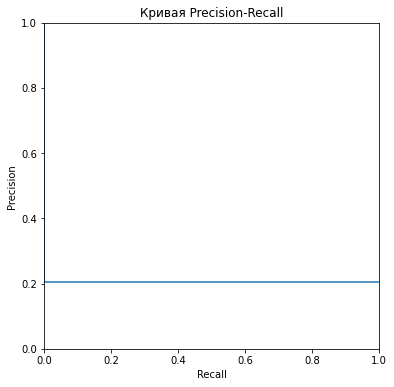

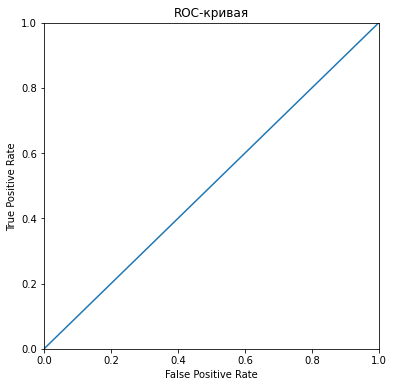

Площадь под ROC-кривой 0.5


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
target_pred_constant = pd.Series(df_target_valid_oe.where(df_target_valid_oe == 0, 0))
print('Accuracy модели на валидационной выборке через принудительное зануление:', accuracy_score(df_target_valid_oe, target_pred_constant))
model = DummyClassifier(random_state=12345)
model.fit(df_features_train_oe, df_target_train_oe)
print('Accuracy модели на обучающей выборке через DummyClassifier:', model.score(df_features_train_oe, df_target_train_oe))
print('Accuracy модели на валидационной выборке через DummyClassifier:', model.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy модели на тестовой выборке через DummyClassifier:', model.score(df_features_test_oe, df_target_test_oe))
table = analysis(model, df_features_valid_oe, df_target_valid_oe, 'Dummy')

<font color='DarkBlue'> 
📌 Отображается стандартная ошибка, появляющаяся при определении точности в процессе выполнения созданной функции <br>   
📌 Для алгоритма 'Логистическая регрессия' рекомендуется закодировать признаки типа 'object', обозначая метод прямого кодирования (One-Hot Encoding), образующий большее количество невзаимосвязанных признаков, имеющих смысл и используемых в формулах алгоритма <br>   
</font> 

In [18]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_features_ohe = df_ohe.drop('exited', axis=1)
df_target_ohe = df_ohe['exited']
df_features_train_ohe, df_features_valid_ohe, df_target_train_ohe, df_target_valid_ohe = train_test_split(df_features_ohe, df_target_ohe, stratify=df_target_ohe, test_size=0.4, random_state=12345)
df_features_valid_ohe, df_features_test_ohe, df_target_valid_ohe, df_target_test_ohe = train_test_split(df_features_valid_ohe, df_target_valid_ohe, stratify=df_target_valid_ohe, test_size=0.5, random_state=12345)
print(df_features_train_ohe.shape)
print(df_target_train_ohe.shape)
print(df_features_valid_ohe.shape)
print(df_target_valid_ohe.shape)
print(df_features_test_ohe.shape)
print(df_target_test_ohe.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


<font color='DarkBlue'> 
📌 Можно рассмотреть состав промежуточной таблицы с признаками после преобразования One-Hot Encoding <br>
</font> 

In [19]:
df_features_train_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2837,549,49,6,124829.156250,1,0,1,93551.359375,1,0,0
9925,694,38,5,195926.390625,1,1,1,85522.843750,0,0,0
8746,660,34,8,106486.656250,2,0,1,182262.656250,0,0,1
660,632,41,5,81877.382812,1,1,1,33642.210938,1,0,0
3610,580,56,1,131368.296875,1,1,0,106918.671875,0,0,0


<font color='DarkBlue'> 
📌 Можно обучить модель в соответствии с алгоритмом 'Логистическая регрессия' сначала без масштабирования признаков, используя в качестве гиперпараметра критерий внутреннего алгоритма <br>
</font> 

In [20]:
model = LogisticRegression(random_state=12345)
grid = GridSearchCV(model, {'solver': ['lbfgs', 'liblinear']}, scoring='f1', cv=3)
grid.fit(df_features_train_ohe, df_target_train_ohe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)   

Лучшая модель: LogisticRegression(random_state=12345, solver='liblinear')
Параметры лучшей модели: {'solver': 'liblinear'}
Лучшая метрика F1: 0.10356433382806257


<font color='DarkBlue'> 
📌 Затем предполагается определение 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.7926666666666666
Accuracy определенной модели на валидационной выборке: 0.7905
Accuracy определенной модели на тестовой выборке: 0.7885
[[1567   25]
 [ 394   14]]
Recall: 0.03431372549019608
Precision: 0.358974358974359
F1: 0.06263982102908278


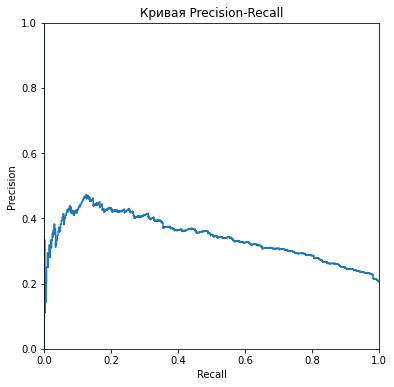

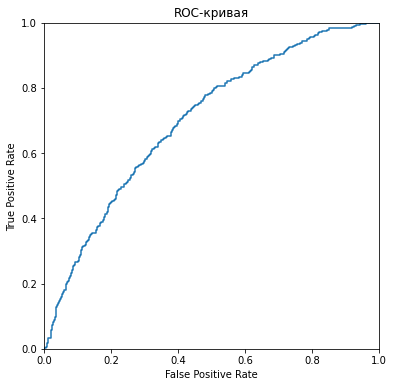

Площадь под ROC-кривой 0.6986202458370282


In [21]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_ohe, df_target_train_ohe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_ohe, df_target_valid_ohe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_ohe, df_target_test_ohe))
table = analysis(grid.best_estimator_, df_features_valid_ohe, df_target_valid_ohe, 'LR+OHE(not_scaling)')

<font color='DarkBlue'> 
📌 Площадь под ROC-кривой, похожей на прямую, больше 0.5, но намного меньше площади предыдущей модели. Все остальные метрики также хуже, F1-мера почти нулевая по причине низкой полноты. Необходимо проверить результаты той же модели, обученной после масштабирования признаков <br>  
</font> 

In [22]:
numeric = df.select_dtypes(include=['uint8','uint16','float32']).drop('exited', axis=1).columns
print(numeric)
scaler = StandardScaler()
scaler.fit(df_features_train_ohe[numeric]) 
df_features_train_ohe[numeric] = scaler.transform(df_features_train_ohe[numeric])
df_features_valid_ohe[numeric] = scaler.transform(df_features_valid_ohe[numeric])
df_features_test_ohe[numeric] = scaler.transform(df_features_test_ohe[numeric])

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary'],
      dtype='object')


<font color='DarkBlue'> 
📌 Можно рассмотреть состав промежуточной таблицы с признаками после масштабирования <br>  
</font> 

In [23]:
df_features_train_ohe.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2837,-1.040434,0.953312,0.360600,0.774657,-0.914708,-1.525709,0.969466,-0.119110,1,0,0
9925,0.454006,-0.095244,-0.002786,1.910540,-0.914708,0.655433,0.969466,-0.258658,0,0,0
8746,0.103585,-0.476537,1.087371,0.481608,0.820981,-1.525709,0.969466,1.422835,0,0,1
660,-0.184996,0.190726,-0.002786,0.088439,-0.914708,0.655433,0.969466,-1.160427,1,0,0
3610,-0.720933,1.620574,-1.456328,0.879129,-0.914708,0.655433,-1.031496,0.113236,0,0,0


<font color='DarkBlue'> 
📌 Теперь нужно обучить модель в соответствии с алгоритмом 'Логистическая регрессия' <br>  
</font> 

In [24]:
model = LogisticRegression(random_state=12345)
grid = GridSearchCV(model, {'solver': ['lbfgs', 'liblinear']}, scoring='f1', cv=3)
grid.fit(df_features_train_ohe, df_target_train_ohe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)   

Лучшая модель: LogisticRegression(random_state=12345, solver='liblinear')
Параметры лучшей модели: {'solver': 'liblinear'}
Лучшая метрика F1: 0.31469617712526426


<font color='DarkBlue'> 
📌 Далее необходимо определение 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения параметров для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.8121666666666667
Accuracy определенной модели на валидационной выборке: 0.8105
Accuracy определенной модели на тестовой выборке: 0.812
[[1538   54]
 [ 325   83]]
Recall: 0.2034313725490196
Precision: 0.6058394160583942
F1: 0.30458715596330277


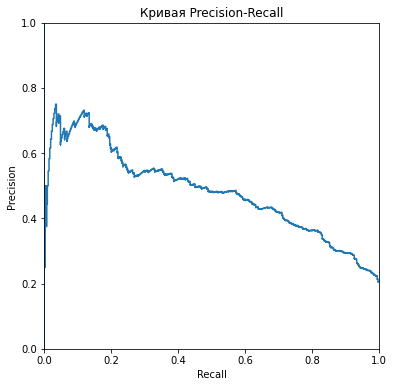

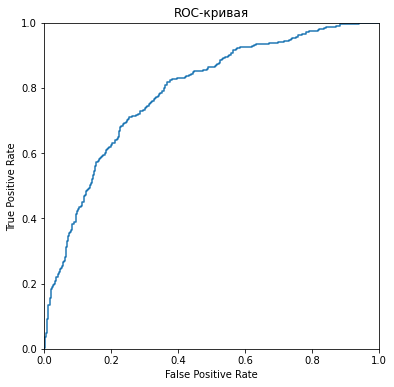

Площадь под ROC-кривой 0.7874436520839493


In [25]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_ohe, df_target_train_ohe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_ohe, df_target_valid_ohe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_ohe, df_target_test_ohe))
table = analysis(grid.best_estimator_, df_features_valid_ohe, df_target_valid_ohe, 'LR+OHE')

<font color='DarkBlue'> 
📌 Все метрики намного лучше таковых у предыдущей модели, значение F1-меры достаточное, но хуже, чем у обученной модели с помощью алгоритма 'Случайный лес' <br>  
</font> 

## Борьба с дисбалансом

<font color='DarkBlue'> 
📌 Разница между количеством значений разных классов далека от 50/50, что может вызвать большое количество неверных предсказаний модели. Для того, чтобы избавиться от дисбаланса, для корректировки весов классов, можно применить методы увеличения количества редкого класса 'upsampling', уменьшения количества доминирующего 'downsapling' или воспользоваться критерием 'balanced' для обучающей выборки <br>  
📌 Сначала необходимо разделить выборки с разными классами, полученные методом кодирования Ordinal Encoding, для целевого и вторичных признаков из обучающей <br>  
</font> 

In [26]:
df_features_zeros_oe = df_features_train_oe[df_target_train_oe == 0]
df_features_ones_oe = df_features_train_oe[df_target_train_oe == 1]
df_target_zeros_oe = df_target_train_oe[df_target_train_oe == 0]
df_target_ones_oe = df_target_train_oe[df_target_train_oe == 1]

<font color='DarkBlue'> 
📌 Затем необходимо создать новые выборки для первых двух из указанных методов со скорректированным балансом, используя 4-кратный коэффициент для выравнивания классов, перемешав записи после выполнения соответствующих операций <br>  
</font> 

In [27]:
df_features_upsampled_oe = pd.concat([df_features_zeros_oe] + [df_features_ones_oe] * 4)
df_target_upsampled_oe = pd.concat([df_target_zeros_oe] + [df_target_ones_oe] * 4)
df_features_upsampled_oe, df_target_upsampled_oe = shuffle(df_features_upsampled_oe, df_target_upsampled_oe, random_state=12345)
df_features_downsampled_oe = pd.concat([df_features_zeros_oe.sample(frac=0.25, random_state=12345)] + [df_features_ones_oe])
df_target_downsampled_oe = pd.concat([df_target_zeros_oe.sample(frac=0.25, random_state=12345)] + [df_target_ones_oe])
df_features_downsampled_oe, df_target_downsampled_oe = shuffle(df_features_downsampled_oe, df_target_downsampled_oe, random_state=12345)

<font color='DarkBlue'> 
📌 Нужно обучить модель алгоритмом 'Случайный лес', используя новую выборку, полученную методом 'upsampling' <br>  
</font> 

In [28]:
model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model, {'criterion': ['gini', 'entropy'], 'n_estimators': range (1, 51, 10), 'max_depth': range (1, 11)}, scoring='f1', cv=3)
grid.fit(df_features_upsampled_oe, df_target_upsampled_oe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)    

Лучшая модель: RandomForestClassifier(max_depth=10, n_estimators=41, random_state=12345)
Параметры лучшей модели: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 41}
Лучшая метрика F1: 0.8631017483945237


<font color='DarkBlue'> 
📌 Затем необходимо определение 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.914
Accuracy определенной модели на валидационной выборке: 0.8335
Accuracy определенной модели на тестовой выборке: 0.822
[[1379  213]
 [ 120  288]]
Recall: 0.7058823529411765
Precision: 0.5748502994011976
F1: 0.6336633663366337


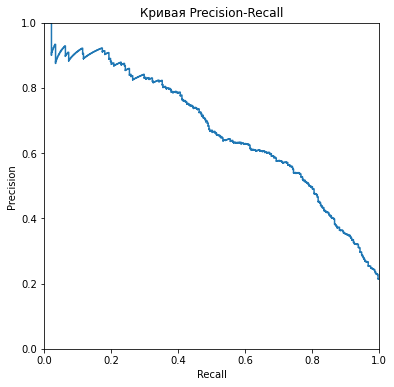

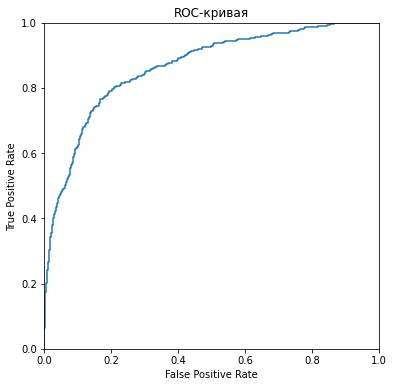

Площадь под ROC-кривой 0.8636842299733964


In [29]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_oe, df_target_train_oe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_oe, df_target_test_oe))
table = analysis(grid.best_estimator_, df_features_valid_oe, df_target_valid_oe, 'RFC+OE+Up')

<font color='DarkBlue'> 
📌 Все метрики имеют очень хорошие показатели, модель хорошо обучена, значение F1-меры больше 0,63, большая площадь под ROC-кривой <br>  
📌 Теперь нужно обучить модель алгоритмом 'Случайный лес', используя новую выборку, полученную методом 'downsampling' <br>      
</font> 

In [30]:
model = RandomForestClassifier(random_state=12345)
grid = GridSearchCV(model, {'criterion': ['gini', 'entropy'], 'n_estimators': range (1, 51, 10), 'max_depth': range (1, 11)}, scoring='f1', cv=3)
grid.fit(df_features_downsampled_oe, df_target_downsampled_oe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)    

Лучшая модель: RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=21,
                       random_state=12345)
Параметры лучшей модели: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 21}
Лучшая метрика F1: 0.7716970617029592


<font color='DarkBlue'> 
📌 Нужно определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.818
Accuracy определенной модели на валидационной выборке: 0.7945
Accuracy определенной модели на тестовой выборке: 0.7705
[[1271  321]
 [  90  318]]
Recall: 0.7794117647058824
Precision: 0.49765258215962443
F1: 0.6074498567335245


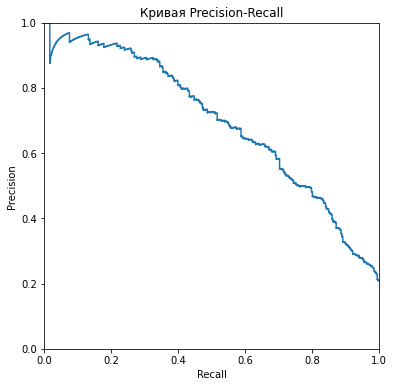

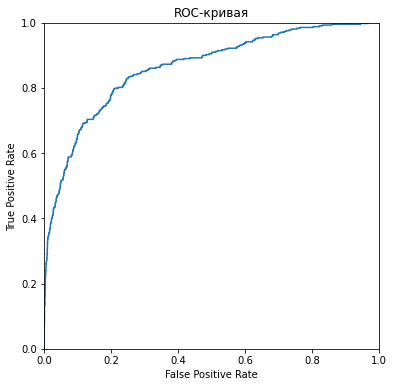

Площадь под ROC-кривой 0.8620161161198149


In [31]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_oe, df_target_train_oe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_oe, df_target_test_oe))
table = analysis(grid.best_estimator_, df_features_valid_oe, df_target_valid_oe, 'RFC+OE+Down')

<font color='DarkBlue'> 
📌 Метрики имеют хорошие показатели, но хуже, чем у предыдущей модели, так как количество элементов обучающей выборки меньше, но расчет производится быстрее <br>  
📌 Теперь нужно обучить модель алгоритмом 'Случайный лес', используя дополнительный критерий для алгоритма 'balanced' <br>      
</font> 

In [32]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
grid = GridSearchCV(model, {'criterion': ['gini', 'entropy'], 'n_estimators': range (1, 51, 10), 'max_depth': range (1, 11)}, scoring='f1', cv=3)
grid.fit(df_features_train_oe, df_target_train_oe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)    

Лучшая модель: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=31, random_state=12345)
Параметры лучшей модели: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 31}
Лучшая метрика F1: 0.6001987514405639


<font color='DarkBlue'> 
📌 Необходимо определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.9116666666666666
Accuracy определенной модели на валидационной выборке: 0.8425
Accuracy определенной модели на тестовой выборке: 0.8255
[[1416  176]
 [ 139  269]]
Recall: 0.6593137254901961
Precision: 0.604494382022472
F1: 0.6307151230949589


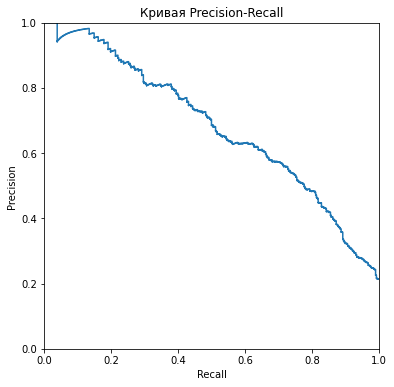

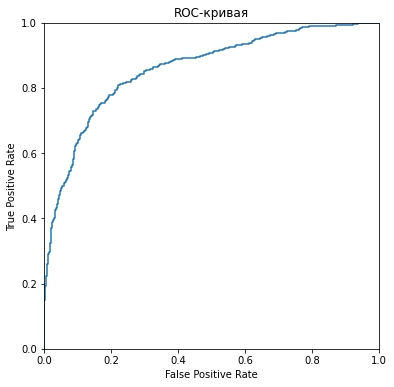

Площадь под ROC-кривой 0.8590301384372843


In [33]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_oe, df_target_train_oe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_oe, df_target_test_oe))
table = analysis(grid.best_estimator_, df_features_valid_oe, df_target_valid_oe, 'RFC+OE+Balance')

<font color='DarkBlue'> 
📌 Метрики автоматически сбалансированной модели имеют лучшие показатели, подобные модели, использующей выборки, полученные методом 'upsampling' <br>  
📌 Необходимо разделить выборки с разными классами, полученные методом кодирования One-Hot Encoding, для целевого и вторичных признаков из обучающей <br>      
</font> 

In [34]:
df_features_zeros_ohe = df_features_train_ohe[df_target_train_ohe == 0]
df_features_ones_ohe = df_features_train_ohe[df_target_train_ohe == 1]
df_target_zeros_ohe = df_target_train_ohe[df_target_train_ohe == 0]
df_target_ones_ohe = df_target_train_ohe[df_target_train_ohe == 1]

<font color='DarkBlue'> 
📌 Также необходимо создать новые выборки со скорректированным балансом, используя 5-кратный коэффициент для выравнивания классов, перемешав записи после выполнения соответствующих операций <br>  
</font> 

In [35]:
df_features_upsampled_ohe = pd.concat([df_features_zeros_ohe] + [df_features_ones_ohe] * 4)
df_target_upsampled_ohe = pd.concat([df_target_zeros_ohe] + [df_target_ones_ohe] * 4)
df_features_upsampled_ohe, df_target_upsampled_ohe = shuffle(df_features_upsampled_ohe, df_target_upsampled_ohe, random_state=12345)
df_features_downsampled_ohe = pd.concat([df_features_zeros_ohe.sample(frac=0.25, random_state=12345)] + [df_features_ones_ohe])
df_target_downsampled_ohe = pd.concat([df_target_zeros_ohe.sample(frac=0.25, random_state=12345)] + [df_target_ones_ohe])
df_features_downsampled_ohe, df_target_downsampled_ohe = shuffle(df_features_downsampled_ohe, df_target_downsampled_ohe, random_state=12345)

<font color='DarkBlue'> 
📌 Следует рассмотреть модель алгоритмом 'Логистическая регрессия', используя выборку, полученную методом 'upsampling' <br>       
</font> 

In [36]:
model = LogisticRegression(random_state=12345)
grid = GridSearchCV(model, {'solver': ['lbfgs', 'liblinear']}, scoring='f1', cv=3)
grid.fit(df_features_upsampled_ohe, df_target_upsampled_ohe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)  

Лучшая модель: LogisticRegression(random_state=12345)
Параметры лучшей модели: {'solver': 'lbfgs'}
Лучшая метрика F1: 0.6972529225095642


<font color='DarkBlue'> 
📌 Необходимо определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.7055
Accuracy определенной модели на валидационной выборке: 0.7255
Accuracy определенной модели на тестовой выборке: 0.695
[[1148  444]
 [ 105  303]]
Recall: 0.7426470588235294
Precision: 0.40562248995983935
F1: 0.5246753246753246


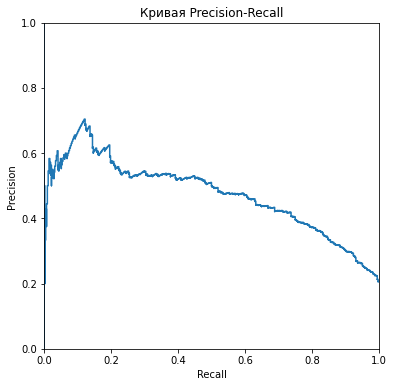

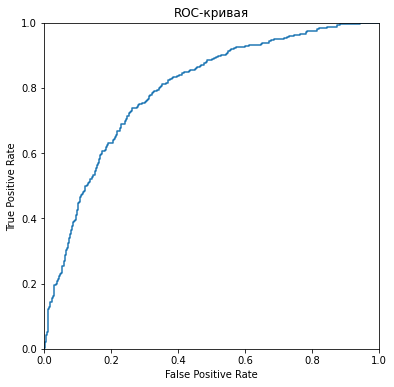

Площадь под ROC-кривой 0.7937435338456991


In [37]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_ohe, df_target_train_ohe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_ohe, df_target_valid_ohe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_ohe, df_target_test_ohe))
table = analysis(grid.best_estimator_, df_features_valid_ohe, df_target_valid_ohe, 'LR+OHE+Up')

<font color='DarkBlue'> 
📌 Модель имеет лучшие показатели, чем у использующей несбалансированные классы, но хуже, чем полученной после обучения алгоритмом 'Случайный лес' <br>  
📌 Следует рассмотреть модель алгоритмом 'Логистическая регрессия', используя выборку, полученную методом 'downsampling' <br>   
</font> 

In [38]:
model = LogisticRegression(random_state=12345)
grid = GridSearchCV(model, {'solver': ['lbfgs', 'liblinear']}, scoring='f1', cv=3)
grid.fit(df_features_downsampled_ohe, df_target_downsampled_ohe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)  

Лучшая модель: LogisticRegression(random_state=12345)
Параметры лучшей модели: {'solver': 'lbfgs'}
Лучшая метрика F1: 0.6966445317586146


<font color='DarkBlue'> 
📌 Необходимо определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.7053333333333334
Accuracy определенной модели на валидационной выборке: 0.726
Accuracy определенной модели на тестовой выборке: 0.6955
[[1146  446]
 [ 102  306]]
Recall: 0.75
Precision: 0.40691489361702127
F1: 0.5275862068965517


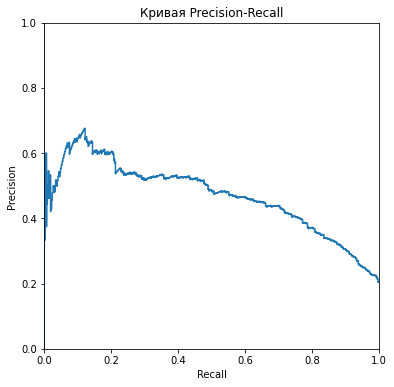

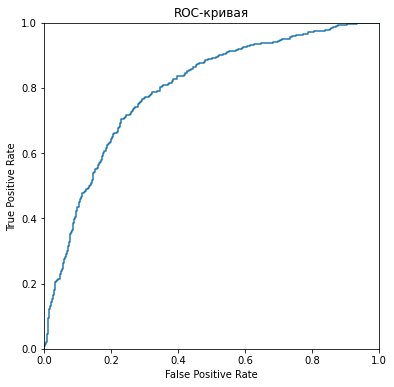

Площадь под ROC-кривой 0.7924610799093506


In [39]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_ohe, df_target_train_ohe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_ohe, df_target_valid_ohe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_ohe, df_target_test_ohe))
table = analysis(grid.best_estimator_, df_features_valid_ohe, df_target_valid_ohe, 'LR+OHE+Down')

<font color='DarkBlue'> 
📌 Модель имеет качество метрик, подобное предыдущей <br>  
📌 Теперь нужно обучить модель алгоритмом 'Логистическая регрессия', используя дополнительный критерий для алгоритма 'balanced' <br>     
</font> 

In [40]:
model = LogisticRegression(random_state=12345, class_weight='balanced')
grid = GridSearchCV(model, {'solver': ['lbfgs', 'liblinear']}, scoring='f1', cv=3)
grid.fit(df_features_train_ohe, df_target_train_ohe)
print('Лучшая модель:', grid.best_estimator_)
print('Параметры лучшей модели:', grid.best_params_)  
print('Лучшая метрика F1:', grid.best_score_)  

Лучшая модель: LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')
Параметры лучшей модели: {'solver': 'liblinear'}
Лучшая метрика F1: 0.48513126441796944


<font color='DarkBlue'> 
📌 Необходимо определить 'accuracy' модели на обучающей, валидационной и тестовой выборках и выполнение функции отображения метрик для наилучшей обученной модели <br>
</font> 

Accuracy определенной модели на обучающей выборке: 0.709
Accuracy определенной модели на валидационной выборке: 0.7315
Accuracy определенной модели на тестовой выборке: 0.698
[[1162  430]
 [ 107  301]]
Recall: 0.7377450980392157
Precision: 0.4117647058823529
F1: 0.5285338015803336


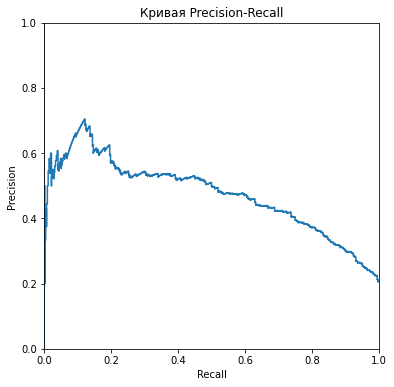

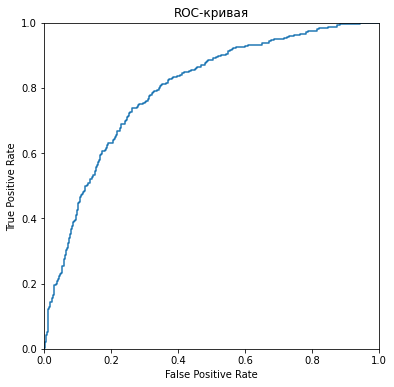

Площадь под ROC-кривой 0.7936511602128288


In [41]:
print('Accuracy определенной модели на обучающей выборке:', grid.best_estimator_.score(df_features_train_ohe, df_target_train_ohe))
print('Accuracy определенной модели на валидационной выборке:', grid.best_estimator_.score(df_features_valid_ohe, df_target_valid_ohe))
print('Accuracy определенной модели на тестовой выборке:', grid.best_estimator_.score(df_features_test_ohe, df_target_test_ohe))
table = analysis(grid.best_estimator_, df_features_valid_ohe, df_target_valid_ohe, 'LR+OHE+Balance')

<font color='DarkBlue'> 
📌 Модель имеет немного лучшее качество метрик, чем у предыдущих, обученных с использованием подобного алгоритма <br>   
📌 Можно установить, что алгоритм 'Случайный лес' является более оптимальным для исходной выборки <br>    
</font> 

## Тестирование модели

<font color='DarkBlue'> 
📌 Необходимо провести финальное тестирование для лучшей модели, обученной в соответствии с алгоритмом 'Случайный лес' и с дополнительным критерием для автоматической балансировки классов. Для информации модель, полученная с помощью ручной балансировки методом корректировки дисбаланса 'upsampling' также предсказывает с достаточно высоким качеством <br>   
📌 Также можно вывести на экран таблицу с общими метриками моделей, обученных всеми перечисленными выше методами <br>    
</font> 

Accuracy определенной модели на обучающей выборке: 0.9188333333333333
Accuracy определенной модели на валидационной выборке: 0.8415
Accuracy определенной модели на тестовой выборке: 0.829
[[1423  170]
 [ 172  235]]
Recall: 0.5773955773955773
Precision: 0.5802469135802469
F1: 0.5788177339901478


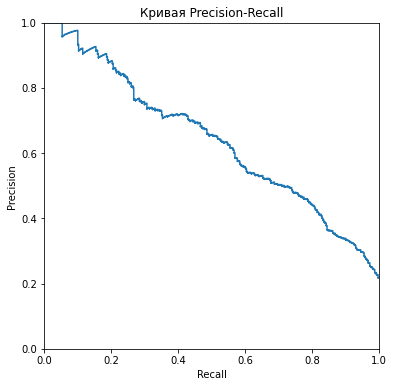

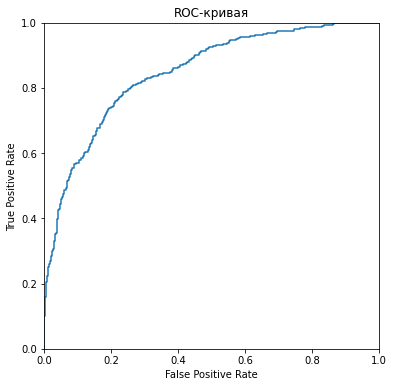

Площадь под ROC-кривой 0.8464180667570499


,name,score,recall,precision,f1,roc_auc
0,RFC+OE,0.8595,0.428922,0.784753,0.554675,0.870246
1,Dummy,0.7960,0.000000,0.000000,0.000000,0.500000
2,LR+OHE(not_scaling),0.7905,0.034314,0.358974,0.062640,0.698620
3,LR+OHE,0.8105,0.203431,0.605839,0.304587,0.787444
4,RFC+OE+Up,0.8335,0.705882,0.574850,0.633663,0.863684
5,RFC+OE+Down,0.7945,0.779412,0.497653,0.607450,0.862016
6,RFC+OE+Balance,0.8425,0.659314,0.604494,0.630715,0.859030
7,LR+OHE+Up,0.7255,0.742647,0.405622,0.524675,0.793744
8,LR+OHE+Down,0.7260,0.750000,0.406915,0.527586,0.792461
9,LR+OHE+Balance,0.7315,0.737745,0.411765,0.528534,0.793651


In [42]:
model = RandomForestClassifier(random_state=12345, n_estimators=31, max_depth=10, criterion = 'gini', class_weight='balanced')
model.fit(df_features_train_oe, df_target_train_oe)
print('Accuracy определенной модели на обучающей выборке:', model.score(df_features_train_oe, df_target_train_oe))
print('Accuracy определенной модели на валидационной выборке:', model.score(df_features_valid_oe, df_target_valid_oe))
print('Accuracy определенной модели на тестовой выборке:', model.score(df_features_test_oe, df_target_test_oe))
table = analysis(model, df_features_test_oe, df_target_test_oe, 'RFC+OE+Balance(test)')
table

<font color='DarkBlue'> 
📌 Не все модели проходят проверку на адекватность, площадь под ROC-кривой больше 0.5, но 'accuracy' на валидационной выборке у многих моделей меньше, чем у полученной через алгоритм обучения DummyClassifier. Эти модели рассматривать не стоит <br>   
📌 На основании произведенных исследований можно сформировать следующие выводы: <br>   
    - предоставленные данные хорошего качества, для более удобного расчета необходимо преобразование типов данных в форматы, занимающие меньший объем памяти и заполнение пропусков одного из столбцов усредненными значениями, <br>
    - определено, что наилучшим алгоритмом обучения модели для прогноза ухода клиентов по исходным данным будет являться 'Случайный лес' с критерием для балансировки классов, так как количество верно определенных целевых признаков согласно метрике 'accuracy' на валидационной выборке больше, как и значение метрики 'precision' в сравнении с моделью, обученной тем же алгоритмом после преобразования данных тренировочной выборки методом 'upsampling'. Но, например, в случае выбора клиентов для рассылки промокодов при отсутствии критичного ограничения бюджета лучшей моделью будет полученная указанным методом по причине большей полноты, соответственно, охвата большего круга клиентов, потенциально планирующих отказ от услуг банка, <br>    
    - у выбранной модели F1-мера на тестовой выборке больше 0.59 согласно поставленной задаче, остальные метрики, включая важную метрику - площадь под ROC-кривой, также являются одними из наилучших среди обученных в исследовании моделей <br> 
</font> 